In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import math

import pit

In [3]:
pit.czytanie_danych.testy_czyt_pit()

C:\Users\cezar\anaconda3\lib\site-packages\pandas\io\excel\_base.py:1272: FutureWarning: Defining usecols with out of bounds indices is deprecated and will raise a ParserError in a future version.
  return self._reader.parse(


In [4]:
dane_gminy_2020       = "data\\2020\\20210215_Gminy_2_za_2020.xlsx"
dane_powiaty_2020     = "data\\2020\\20210211_Powiaty_za_2020.xlsx"
dane_miasta_npp_2020  = "data\\2020\\20210215_Miasta_NPP_2_za_2020.xlsx"
dane_wojewodztwa_2020 = "data\\2020\\20210211_Województwa_za_2020.xlsx"
dane_metropolie_2020  = "data\\2020\\20210211_Metropolia_2020.xlsx"

dane_gminy_2019       = "data\\2019\\20200214_Gminy_za_2019.xlsx"
dane_powiaty_2019     = "data\\2019\\20200214_Powiaty_za_2019.xlsx"
dane_miasta_npp_2019  = "data\\2019\\20200214_Miasta_NPP_za_2019.xlsx"
dane_wojewodztwa_2019 = "data\\2019\\20200214_Wojewodztwa_za_2019.xlsx"
dane_metropolie_2019  = "data\\2019\\20200214_Gornoslasko_Zaglebiowska_Metropolia.xlsx"

dane_ludnosc_gminy_2020 = "data\\Ludność.Stan i struktura_31.12.2020\\tabela12.xls"
dane_ludnosc_powiaty_2020 = "data\\Ludność.Stan i struktura_31.12.2020\\tabela06.xls"
dane_ludnosc_wojewodztwa_2020 = "data\\Ludność.Stan i struktura_31.12.2020\\tabela06.xls"


In [5]:
# zapisuję w zmiennych te wartości, które przydadzą mi się do najbliższych działań, czyli nazwa jednostki oraz dochód wygenerowany przez tą jednostkę w latach 2019 i 2020
dochod_na_jst_gminy_2020       = pit.czytanie_danych.czyt_pit_gminy(dane_gminy_2020)
dochod_na_jst_powiaty_2020     = pit.czytanie_danych.czyt_pit_powiaty(dane_powiaty_2020)
dochod_na_jst_miasta_npp_2020  = pit.czytanie_danych.czyt_pit_powiaty(dane_miasta_npp_2020)
dochod_na_jst_wojewodztwa_2020 = pit.czytanie_danych.czyt_pit_wojewodztwa(dane_wojewodztwa_2020)
dochod_na_jst_metropolie_2020  = pit.czytanie_danych.czyt_pit_powiaty(dane_metropolie_2020)

dochod_na_jst_powiaty_miasta_npp_2020 = pit.czyt_pit_powiaty_miasta_npp(dane_powiaty_2020, dane_miasta_npp_2020)
dochod_na_jst_powiaty_miasta_npp_2019 = pit.czyt_pit_powiaty_miasta_npp(dane_powiaty_2019, dane_miasta_npp_2019)


dochod_na_jst_gminy_2019       = pit.czytanie_danych.czyt_pit_gminy(dane_gminy_2019)
dochod_na_jst_powiaty_2019     = pit.czytanie_danych.czyt_pit_powiaty(dane_powiaty_2019)
dochod_na_jst_miasta_npp_2019  = pit.czytanie_danych.czyt_pit_powiaty(dane_miasta_npp_2019)
dochod_na_jst_wojewodztwa_2019 = pit.czytanie_danych.czyt_pit_wojewodztwa(dane_wojewodztwa_2019)
dochod_na_jst_metropolie_2019  = pit.czytanie_danych.czyt_pit_powiaty(dane_metropolie_2019)



In [6]:
dochod_na_jst_gminy_2020

,WK,PK,GK,GT,Dochody wykonane
0,02,01,01,01,40456699
1,02,01,02,02,13789712
2,02,01,03,02,3573540
3,02,01,04,03,9553744
4,02,01,05,02,5844560
...,...,...,...,...,...
2406,32,18,01,03,2010454
2407,32,18,02,03,8834999
2408,32,18,03,02,1546533
2409,32,18,04,03,6612100


In [ ]:
# teraz liczę różnicę w dochodach w latach 2019 i 2020 w stukturach: gmina, powiat, miasto na prawach powiatu, województwo, metropolia
roznica_w_gminach_19_20 = pit.analiza_danych.obliczanie_roznicy_pit(dochod_na_jst_gminy_2019,dochod_na_jst_gminy_2020)
roznica_w_powiatach_19_20 = pit.analiza_danych.obliczanie_roznicy_pit(dochod_na_jst_powiaty_miasta_npp_2019,dochod_na_jst_powiaty_miasta_npp_2020)
roznica_w_wojewodztwach_19_20 = pit.analiza_danych.obliczanie_roznicy_pit(dochod_na_jst_wojewodztwa_2019,dochod_na_jst_wojewodztwa_2020)

Wykresy kołowe przedstawiające, w którym roku dochody z podatku pit były większe

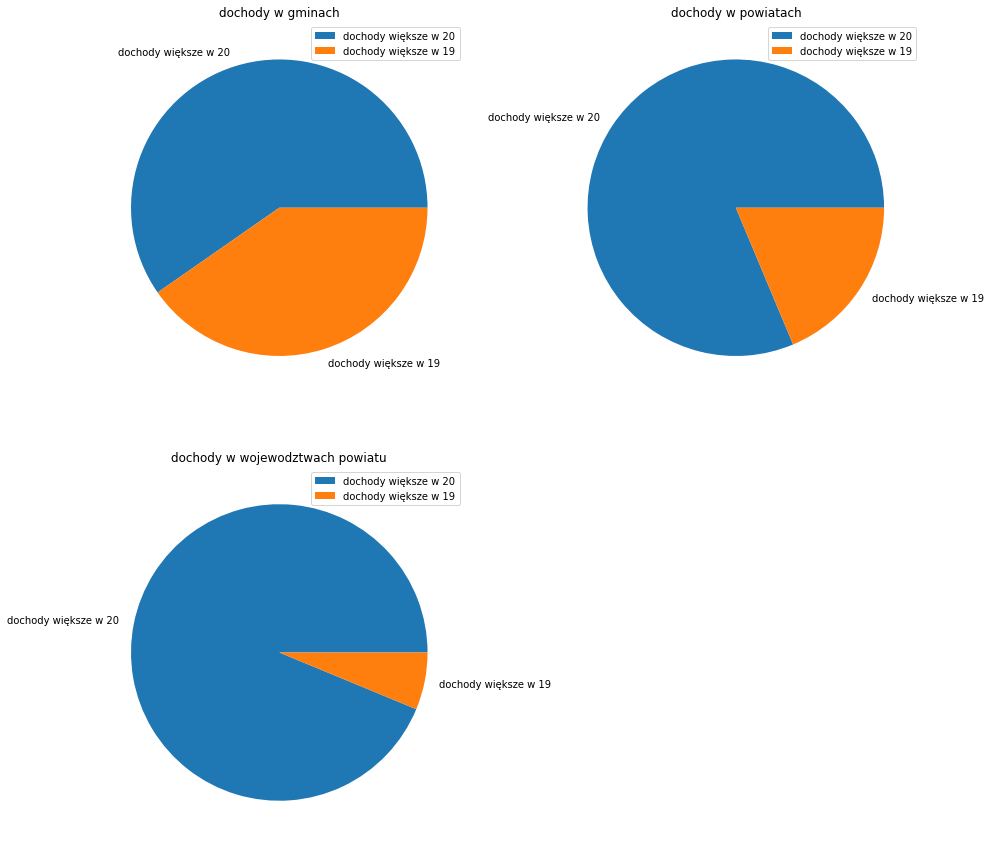

In [ ]:
# Rysuję wykresy kołowe przedstawiające procentowy rozkład ile jednostek zarobiło więcej w 2019, a ile w 2020
plt.subplot(2,2,1)
pit.analiza_danych.wykres.pie(roznica_w_gminach_19_20,'dochody w gminach')

plt.subplot(2,2,2)
pit.analiza_danych.wykres.pie(roznica_w_powiatach_19_20,'dochody w powiatach')

plt.subplot(2,2,3)
pit.analiza_danych.wykres.pie(roznica_w_wojewodztwach_19_20,'dochody w wojewodztwach powiatu')


In [ ]:
ludnosc_w_gminach_2020 = pit.czyt_ludnosc_gminy(dane_ludnosc_gminy_2020)
ludnosc_w_powiatach_2020 = pit.czyt_ludnosc_powiaty(dane_ludnosc_powiaty_2020)
ludnosc_w_wojewodztwach_2020 = pit.czyt_ludnosc_wojewodztwa(dane_ludnosc_wojewodztwa_2020)

Wyznacznie średniego dochodu opodatkowanego dla gmin, powiatów i województw

In [ ]:
sredni_dochod_opodatkowany_gminy = pit.analiza_danych.sredni_dochod_opodatkowany(dochod_na_jst_gminy_2020, ludnosc_w_gminach_2020)
sredni_dochod_opodatkowany_powiaty = pit.analiza_danych.sredni_dochod_opodatkowany(dochod_na_jst_powiaty_miasta_npp_2020, ludnosc_w_powiatach_2020)
sredni_dochod_opodatkowany_wojewodztwa = pit.analiza_danych.sredni_dochod_opodatkowany(dochod_na_jst_wojewodztwa_2020, ludnosc_w_wojewodztwach_2020)

nie wszystkie jednostki będą opisane w zestawieniu-w którymś z plików jest inna liczba jst


(array([710., 585., 381., 191., 106.,  68.,  56.,  51.,  45.,  26.,  18.,
         23.,  12.,  16.,   9.,   9.,   5.,  11.,   8.,   8.,   8.,   6.,
          0.,   3.,   2.,   3.,   6.,   3.,   5.,   1.,   3.,   0.,   2.,
          2.,   0.,   1.,   3.,   1.,   1.,   3.,   0.,   0.,   5.,   0.,
          0.,   2.,   1.,   0.,   0.,   2.,   1.,   0.,   1.,   3.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([4.97890853e+00, 7.13020778e+02, 1.42106265e+03, 2.12910452e+03,
        2.83714639e+03, 3.54518825e+03, 4.25323012e+03, 4.96127199e+03,
        5.66931386e+03, 6.37735573e+03, 7.08539760e+03, 7.79343947e+03,
        8.50148134e+03, 9.20952321e+03, 9.91756508e+03, 1.06256069e+04,
        1.13336488e+04, 1.2041

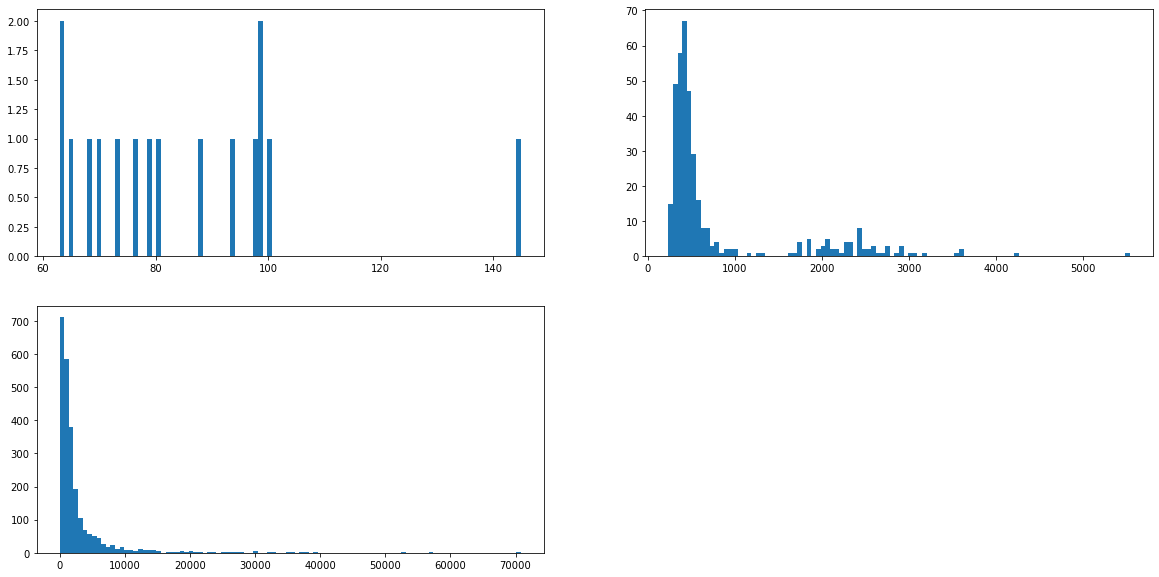

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.hist(sredni_dochod_opodatkowany_wojewodztwa['średni dochód'], bins=100)

plt.subplot(2,2,2)
plt.hist(sredni_dochod_opodatkowany_powiaty['średni dochód'], bins=100)

plt.subplot(2,2,3)
plt.hist(sredni_dochod_opodatkowany_gminy['średni dochód'], bins=100)

Wyznacznie wariancji dochodu podległych jednostek terytorialnych dla powiatów i województw

In [ ]:
wariancja_dochodu_gmin_w_powiecie = pit.wariancja_dochodu_gmin_w_powiecie(dochod_na_jst_gminy_2020)
wariancja_dochodu_powiatow_w_wojewodztwie = pit.wariancja_dochodu_powiatow_w_wojewodztwie(dochod_na_jst_powiaty_miasta_npp_2020)

(array([7., 3., 0., 0., 2., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([2.08212731e+15, 7.45750912e+15, 1.28328909e+16, 1.82082727e+16,
        2.35836545e+16, 2.89590364e+16, 3.43344182e+16, 3.97098000e+16,
        4.50851818e+16, 5.04605636e+16, 5.58359454e+16, 6.12113272e+16,
        6.65867090e+16, 7.19620908e+16, 7.73374727e+16, 8.27128545e+16,
        8.80882363e+16, 9.34636181e+16, 9.88389999e+16, 1.04214382e+17,
        1.09589764e+17, 1.14965145e+17, 1.20340527e+17, 1.25715909e+17,
        1.31091291e+17, 1.36466673e+17, 1.41842054e+17, 1.47217436e+17,
        1.52592818e+17, 1.57968200e+17, 1.6334

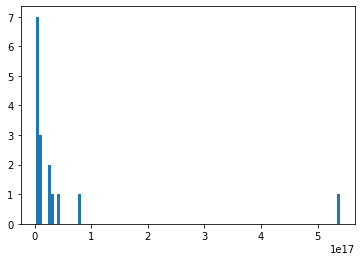

In [ ]:
plt.hist(wariancja_dochodu_powiatow_w_wojewodztwie['wariancja dochodu podległych jednostek'],bins=100)

Wyznacznie średniej ważonej dochodów z podatku pit dla powiatów i województw

In [ ]:
print('Liczenie średniej ważonej dla powiatów')
srednia_wazona_dochodu_powiatow = pit.srednia_wazona_dochodu_powiatow(dochod_na_jst_gminy_2020, ludnosc_w_gminach_2020, ludnosc_w_powiatach_2020)
print('\nLiczenie średniej ważonej dla województw')
srednia_wazona_dochodu_wojewodztw = pit.srednia_wazona_dochodu_wojewodztw(dochod_na_jst_powiaty_miasta_npp_2020, ludnosc_w_powiatach_2020, ludnosc_w_wojewodztwach_2020)


Liczenie średniej ważonej dla powiatów
nie ma gminy o identyfikatorze 02240303 w spisie ludnosci gmin/powiatów pomimo, że jest w spisie dochodu z pit gmin
nie ma gminy o identyfikatorze 06020603 w spisie ludnosci gmin/powiatów pomimo, że jest w spisie dochodu z pit gmin
nie ma gminy o identyfikatorze 06080503 w spisie ludnosci gmin/powiatów pomimo, że jest w spisie dochodu z pit gmin
nie ma gminy o identyfikatorze 14090603 w spisie ludnosci gmin/powiatów pomimo, że jest w spisie dochodu z pit gmin
nie ma gminy o identyfikatorze 14201103 w spisie ludnosci gmin/powiatów pomimo, że jest w spisie dochodu z pit gmin
nie ma gminy o identyfikatorze 14380503 w spisie ludnosci gmin/powiatów pomimo, że jest w spisie dochodu z pit gmin
nie ma gminy o identyfikatorze 18130203 w spisie ludnosci gmin/powiatów pomimo, że jest w spisie dochodu z pit gmin
nie ma gminy o identyfikatorze 26020903 w spisie ludnosci gmin/powiatów pomimo, że jest w spisie dochodu z pit gmin
nie ma gminy o identyfikatorze 28

In [ ]:
path = "excel_dane_gminy.xlsx"
pit.export_to_excel_gminy(path, dochod_na_jst_gminy_2019, dochod_na_jst_gminy_2020, ludnosc_w_gminach_2020, sredni_dochod_opodatkowany_gminy)

C:\Users\cezar\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Teraz wszystkie policzone informacje zapisujemy do plików

In [ ]:
path = "excel_dane_powiaty.xlsx"
pit.export_to_excel_powiaty(path,dochod_na_jst_powiaty_miasta_npp_2019, dochod_na_jst_powiaty_miasta_npp_2020, ludnosc_w_powiatach_2020,sredni_dochod_opodatkowany_powiaty, wariancja_dochodu_gmin_w_powiecie, srednia_wazona_dochodu_powiatow)

In [ ]:
path = "excel_dane_wojewodztwa.xlsx"
pit.export_to_excel_wojewodztwa(path, dochod_na_jst_wojewodztwa_2019, dochod_na_jst_wojewodztwa_2020, ludnosc_w_wojewodztwach_2020, sredni_dochod_opodatkowany_wojewodztwa, wariancja_dochodu_powiatow_w_wojewodztwie, srednia_wazona_dochodu_wojewodztw)